<a href="https://colab.research.google.com/github/tuongvi197ct22673/phantichdulieu/blob/main/Cifas-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load tập dữ liệu từ keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [2]:
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

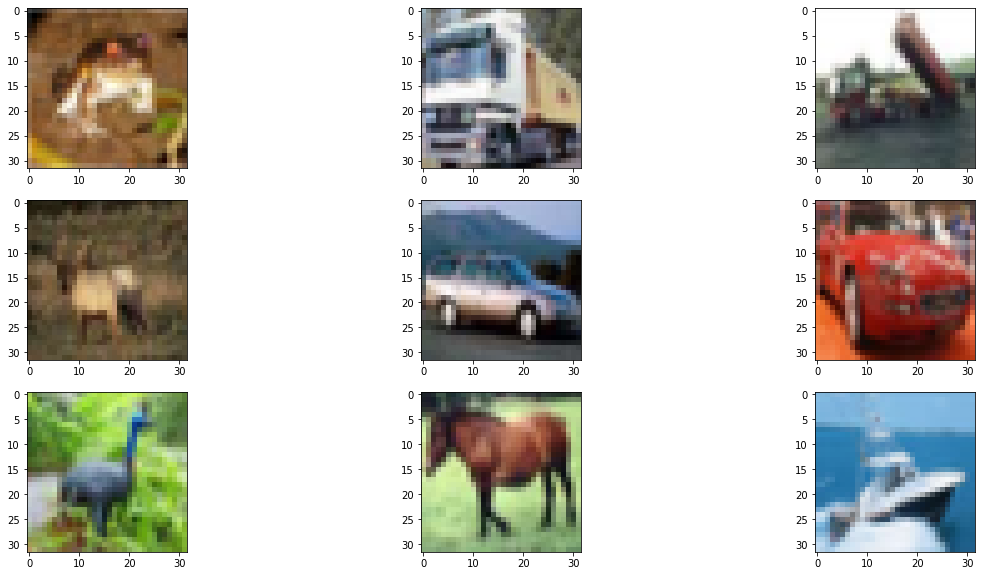

In [7]:
#Hiển thị một số hình ảnh từ tập dữ liệu để có thể quan sát một cách dễ dàng về tập dữ liệu
n=9
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i])
plt.show()

In [8]:
#Tạo hàm để gọi từng phần tử trong tập dữ liệu
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
  

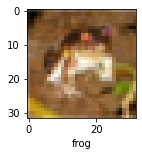

In [9]:
plot_sample(X_train, y_train, 0)

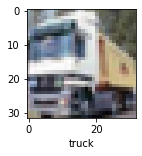

In [10]:
plot_sample(X_train, y_train, 1)

In [11]:
#import vào các layers và module cần thiết để xây dựng kiến trúc mạng neural
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [12]:
#Tạo mô hình sequential để inference, training và thêm vào các layers 
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [13]:
#Cấu hình optimizer và compile mô hình
#hàm complile trả về một đối tượng mã
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
#Xem tóm tắt để hiểu rõ hơn về kiến trúc mô hình
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [15]:
#Training mô hình
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.9702 - accuracy: 0.3838
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2977 - accuracy: 0.5471
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1126 - accuracy: 0.6142
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.0064 - accuracy: 0.6546
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9424 - accuracy: 0.6766
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8788 - accuracy: 0.6991
Epoch 7/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8233 - accuracy: 0.7174
Epoch 8/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7822 - accuracy: 0.7301
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7402 - accuracy: 0.7463
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [16]:
#tính độ chính xác trên tập test set
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.1403 - accuracy: 0.6510


[1.1403006315231323, 0.6510000228881836]

In [17]:
#sử dụng hồi quy tuyến tính
y_pred = cnn.predict(X_test)
y_pred[:5]


array([[4.04603314e-03, 9.58598757e-05, 2.49212142e-02, 8.18320692e-01,
        9.29138158e-03, 1.20871060e-01, 1.93559378e-02, 1.32060563e-03,
        1.72874238e-03, 4.84174016e-05],
       [1.52960166e-01, 4.44300771e-01, 1.31676609e-06, 4.40232088e-06,
        2.66347122e-08, 1.30910927e-08, 7.74627381e-07, 3.82621437e-08,
        3.82327288e-01, 2.04051752e-02],
       [5.39416850e-01, 1.81440637e-02, 1.79280117e-02, 3.41155641e-02,
        6.08242862e-03, 4.66324855e-03, 4.62791696e-03, 2.99505307e-03,
        3.66245210e-01, 5.78169152e-03],
       [6.82209432e-01, 7.04985578e-05, 5.47278440e-03, 7.66356301e-04,
        5.27510769e-04, 1.14807786e-04, 9.66045773e-05, 1.20678596e-04,
        3.10566783e-01, 5.44815302e-05],
       [1.68075694e-05, 2.75744515e-06, 7.67658418e-03, 1.23827709e-02,
        1.66752785e-01, 2.76762433e-03, 8.10366035e-01, 2.82681958e-05,
        5.93557206e-06, 4.56660558e-07]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 0, 0, 6]

In [19]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

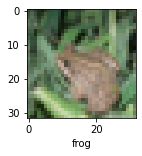

In [20]:
plot_sample(X_test, y_classes,4)

In [21]:
classes[y_classes[4]]

'frog'